<a href="https://colab.research.google.com/github/EmmaJaneShaw/macquarie/blob/main/Default1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [47]:
!pip install anvil-uplink
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install scikit-learn
!pip install scipy
!pip install patsy
!pip install statsmodels
!pip install black
!pip install lineapy



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import

In [46]:
import anvil.server
import lineapy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost as xgb 
import matplotlib.pyplot as plt
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import os #interact with operating system
import seaborn as sns #interactive plots
from pandas import set_option #view more of the dataframe
from functools import reduce
from scipy.stats import randint #discrete random variable
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
import warnings
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.feature_selection import RFE #Feature ranking with recursive feature elimination
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
warnings.filterwarnings('ignore')

%matplotlib inline

Check Working Directory

In [3]:
   
# Get the current working
# directory (CWD)
cwd = os.getcwd()
     
# Print the current working
# directory (CWD)
print("Current working directory:", cwd)

Current working directory: /content


Explore Data

In [4]:
data = pd.read_csv('/content/drive/MyDrive/macquarie_data/credit_card.csv')
data.sample(5)

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,SK_ID_CURR,SRC_VAR_1,SRC_VAR_4,WEEKDAY_APPR_PROCESS_START
268957,13761.0,269550,225000.0,135000,0.0,0.0,0.0,0.0,0.0,2.0,...,1,0,0,0.017,2,2,437699,-0.724,0.466,MONDAY
23253,27000.0,540000,540000.0,180000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.010,2,1,128100,-0.463,0.589,TUESDAY
31057,14963.0,161730,135000.0,247500,0.0,0.0,0.0,0.0,0.0,2.0,...,0,0,0,0.009,2,2,137852,-0.415,0.613,SATURDAY
239393,17748.0,490536,405000.0,135000,1.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0.010,2,2,400194,-0.481,0.579,SATURDAY
75350,30897.0,550980,450000.0,225000,0.0,0.0,1.0,0.0,0.0,3.0,...,1,0,0,0.036,2,2,193721,-0.341,0.653,FRIDAY


Size of Data Set

In [5]:
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 311083 rows and 80 columns


Adjust Viewing Options to see more data

In [6]:
pd.set_option('max_rows', 500)
pd.set_option('max_colwidth', 80)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 80]


Data Types

In [7]:
data.dtypes

AMT_ANNUITY                    float64
AMT_CREDIT                       int64
AMT_GOODS_PRICE                float64
AMT_INCOME_TOTAL                 int64
AMT_REQ_CREDIT_BUREAU_DAY      float64
AMT_REQ_CREDIT_BUREAU_HOUR     float64
AMT_REQ_CREDIT_BUREAU_MON      float64
AMT_REQ_CREDIT_BUREAU_QRT      float64
AMT_REQ_CREDIT_BUREAU_WEEK     float64
AMT_REQ_CREDIT_BUREAU_YEAR     float64
APPLICATION_DATE                object
CNT_CHILDREN                     int64
CNT_FAM_MEMBERS                float64
CODE_GENDER                     object
DATE_DEFAULT_KNOWN              object
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_ID_PUBLISH                  int64
DAYS_LAST_PHONE_CHANGE         float64
DAYS_REGISTRATION                int64
DEF_30_CNT_SOCIAL_CIRCLE       float64
DEF_60_CNT_SOCIAL_CIRCLE       float64
DEFAULT                         object
EDUCATION_CLASS                  int64
ETHNICITY                        int64
EXT_SOURCE_1             

In [8]:
data.dtypes.value_counts()

int64      43
float64    21
object     16
dtype: int64

Look at objects

In [9]:
data.select_dtypes('object').nunique().sort_values(axis=0, ascending=False)

OCCUPATION_TYPE               1017
ORGANIZATION_TYPE               58
DATE_DEFAULT_KNOWN              47
APPLICATION_DATE                36
NAME_INCOME_TYPE                 8
NAME_TYPE_SUITE                  7
WEEKDAY_APPR_PROCESS_START       7
NAME_FAMILY_STATUS               6
NAME_HOUSING_TYPE                6
NAME_EDUCATION_TYPE              5
CODE_GENDER                      3
HOUSETYPE_MODE                   3
DEFAULT                          2
FLAG_OWN_CAR                     2
FLAG_OWN_REALTY                  2
NAME_CONTRACT_TYPE               2
dtype: int64

In [10]:
data.describe()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,SK_ID_CURR,SRC_VAR_1,SRC_VAR_4
count,311070.000000,3.110830e+05,3.107980e+05,3.110830e+05,269034.000000,269034.000000,269034.000000,269034.000000,269034.000000,269034.000000,...,311083.000000,311083.000000,311083.000000,311083.000000,311083.000000,311083.000000,311083.000000,311083.000000,310416.000000,310416.000000
mean,27110.988588,5.990226e+05,5.383921e+05,1.687640e+05,0.007014,0.006401,0.267319,0.265364,0.034419,1.899645,...,0.078172,0.230504,0.015157,0.050765,0.020925,2.052751,2.031824,278180.135173,-0.661913,0.473956
std,14491.096347,4.024976e+05,3.694453e+05,2.359597e+05,0.111050,0.083838,0.916213,0.792189,0.204992,1.868966,...,0.268443,0.421156,0.122176,0.219517,0.013869,0.509085,0.502784,102776.703355,1.183140,0.208352
min,1616.000000,4.500000e+04,4.050000e+04,2.565000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,100002.000000,-16.320000,-1.000000
25%,16538.000000,2.700000e+05,2.385000e+05,1.125000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.010000,2.000000,2.000000,189133.500000,-0.923000,0.375000
50%,24908.000000,5.135310e+05,4.500000e+05,1.471500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.019000,2.000000,2.000000,278213.000000,-0.561000,0.535000
75%,34596.000000,8.086500e+05,6.795000e+05,2.025000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.029000,2.000000,2.000000,367102.500000,-0.402000,0.616000
max,258026.000000,4.050000e+06,4.050000e+06,1.170000e+08,9.000000,4.000000,27.000000,261.000000,8.000000,25.000000,...,1.000000,1.000000,1.000000,1.000000,0.073000,3.000000,3.000000,456255.000000,6.696000,1.000000


Find Missing Values

In [11]:
mis_val=data.isnull().sum()

mis_val_percent = 100*data.isnull().sum()/len(data)

mis_val_table=pd.concat([mis_val, mis_val_percent],axis=1)

mis_val_table_ren_columns = mis_val_table.rename(columns={0:'Missing Values',1:'% of Total Values'})

mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]!=0].sort_values('% of Total Values',ascending=False).round(1)

mis_val_table_ren_columns

,Missing Values,% of Total Values
DATE_DEFAULT_KNOWN,287238,92.3
OWN_CAR_AGE,205314,66.0
EXT_SOURCE_1,175408,56.4
HOUSETYPE_MODE,156147,50.2
OCCUPATION_TYPE,95599,30.7
EXT_SOURCE_3,61729,19.8
AMT_REQ_CREDIT_BUREAU_DAY,42049,13.5
AMT_REQ_CREDIT_BUREAU_HOUR,42049,13.5
AMT_REQ_CREDIT_BUREAU_MON,42049,13.5
AMT_REQ_CREDIT_BUREAU_QRT,42049,13.5


examine missing application date information

In [12]:
miss_app_date = data[data['APPLICATION_DATE'].isnull()]
miss_app_date.head()


,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,SK_ID_CURR,SRC_VAR_1,SRC_VAR_4,WEEKDAY_APPR_PROCESS_START
307511,56093.0,1096020,900000.0,180000,0.0,0.0,0.0,0.0,2.0,0.0,...,1,0,0,0.021,3,3,105115,-1.267,0.278,SATURDAY
307512,20120.0,254700,225000.0,135000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.010,2,2,123237,-0.443,0.599,THURSDAY
307513,43722.0,1125000,1125000.0,180000,0.0,0.0,0.0,2.0,0.0,0.0,...,0,0,0,0.015,2,2,124951,-0.388,0.628,THURSDAY
307514,35685.0,450000,450000.0,112500,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0.011,3,3,139708,-0.711,0.471,THURSDAY
307515,26042.0,942300,675000.0,157500,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0.011,3,3,144785,-0.924,0.387,SUNDAY


In [13]:
mis_val_app=miss_app_date.isnull().sum()

mis_val_app_percent = 100*miss_app_date.isnull().sum()/len(miss_app_date)
mis_val_app_table=pd.concat([mis_val_app, mis_val_app_percent],axis=1)
mis_val_app_table_ren_columns = mis_val_app_table.rename(columns={0:'Missing Values',1:'% of Total Values'})

mis_val_app_table_ren_columns = mis_val_app_table_ren_columns[mis_val_app_table_ren_columns.iloc[:,1]!=0].sort_values('% of Total Values',ascending=False).round(1)

mis_val_app_table_ren_columns

,Missing Values,% of Total Values
APPLICATION_DATE,745,100.0
DATE_DEFAULT_KNOWN,745,100.0
OWN_CAR_AGE,511,68.6
HOUSETYPE_MODE,443,59.5
EXT_SOURCE_1,423,56.8
EXT_SOURCE_3,183,24.6
OCCUPATION_TYPE,170,22.8
AMT_REQ_CREDIT_BUREAU_HOUR,142,19.1
AMT_REQ_CREDIT_BUREAU_MON,142,19.1
AMT_REQ_CREDIT_BUREAU_QRT,142,19.1



*NOTE remove missing APPLICATION_DATE data

Examine other Date Columns

In [14]:
Date_cols = [col for col in data.columns if 'DATE' in col]

print(Date_cols)

['APPLICATION_DATE', 'DATE_DEFAULT_KNOWN']


In [15]:
#defaulted where default date is not known.
default = data[(data['DEFAULT'] =='Yes')]

default[default['DATE_DEFAULT_KNOWN'].isnull()]





,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,SK_ID_CURR,SRC_VAR_1,SRC_VAR_4,WEEKDAY_APPR_PROCESS_START
6,21339.0,436032,360000.0,166500,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0.001,3,3,103726,-1.085,0.332,FRIDAY
8,18684.0,381528,315000.0,67500,0.0,0.0,0.0,0.0,0.0,3.0,...,0,0,0,0.008,3,3,104037,-1.693,0.183,FRIDAY
21,17438.0,371246,261000.0,135000,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0.031,2,2,107403,-0.489,0.576,WEDNESDAY
31,31536.0,578979,517500.0,184500,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.005,2,2,110369,-1.129,0.318,FRIDAY
93,26316.0,900000,900000.0,193500,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,1,0.005,2,2,132603,-3.398,0.033,MONDAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308251,28166.0,582804,463500.0,135000,0.0,0.0,0.0,2.0,0.0,4.0,...,0,0,0,0.007,2,2,454693,-0.552,0.544,THURSDAY
308252,18603.0,382500,382500.0,60750,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0.036,2,2,454759,-1.076,0.334,TUESDAY
308253,34520.0,435276,355500.0,90000,0.0,0.0,1.0,1.0,0.0,4.0,...,0,0,0,0.010,2,2,454812,-0.688,0.482,WEDNESDAY
308254,26474.0,816660,585000.0,190800,0.0,0.0,0.0,0.0,0.0,2.0,...,0,0,0,0.009,2,2,454949,-2.107,0.121,THURSDAY


*NOTE remove 1725 rows where loan is defaulted but they don't know when?

In [16]:
data.APPLICATION_DATE.head()

0    2019-05-31
1    2019-05-31
2    2019-05-31
3    2019-05-31
4    2019-05-31
Name: APPLICATION_DATE, dtype: object

In [17]:
data.DATE_DEFAULT_KNOWN.head()

0    2019-08-31
1    2019-12-31
2    2019-11-30
3    2019-11-30
4    2020-04-30
Name: DATE_DEFAULT_KNOWN, dtype: object

*NOTE both need to be converted from object to datetime

Check that SK_ID_CURR is unique and can be set to INDEX

In [18]:
data['SK_ID_CURR'].is_unique


False

Given False, How many duplicates?

In [19]:
print(data.duplicated(subset=['SK_ID_CURR']).value_counts())

False    307511
True       3572
dtype: int64


In [20]:
print("the number of duplicate rows is:" , len(data[data['SK_ID_CURR'].duplicated()]))

the number of duplicate rows is: 3572


Examine duplicates, create dataframe and save to .csv

In [21]:
duplicateID = data[data[['SK_ID_CURR']].duplicated() == True]
duplicateID


,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,SK_ID_CURR,SRC_VAR_1,SRC_VAR_4,WEEKDAY_APPR_PROCESS_START
307511,56093.0,1096020,900000.0,180000,0.0,0.0,0.0,0.0,2.0,0.0,...,1,0,0,0.021,3,3,105115,-1.267,0.278,SATURDAY
307512,20120.0,254700,225000.0,135000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.010,2,2,123237,-0.443,0.599,THURSDAY
307513,43722.0,1125000,1125000.0,180000,0.0,0.0,0.0,2.0,0.0,0.0,...,0,0,0,0.015,2,2,124951,-0.388,0.628,THURSDAY
307514,35685.0,450000,450000.0,112500,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0.011,3,3,139708,-0.711,0.471,THURSDAY
307515,26042.0,942300,675000.0,157500,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0.011,3,3,144785,-0.924,0.387,SUNDAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311078,15242.0,152820,135000.0,67500,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0.031,2,2,455884,-0.409,0.617,MONDAY
311079,48020.0,1381500,1381500.0,256500,0.0,0.0,1.0,0.0,0.0,9.0,...,0,0,0,0.011,3,3,455954,-1.152,0.311,FRIDAY
311080,58770.0,743864,743864.0,270000,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0.029,2,2,456090,-0.901,0.395,THURSDAY
311081,48456.0,1762110,1575000.0,135000,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0.020,2,2,456216,-1.281,0.274,MONDAY


In [22]:
duplicateID.to_csv('/content/drive/MyDrive/macquarie_data/duplicateID.csv')

*NOTE remove duplicate IDS later on

Examine Target

In [23]:
data['DEFAULT'].value_counts()

No     282686
Yes     25570
Name: DEFAULT, dtype: int64

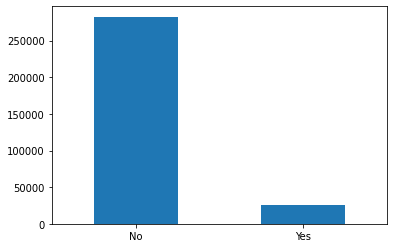

In [24]:
target = data['DEFAULT'].value_counts()
ax = target.plot.bar(rot=0)

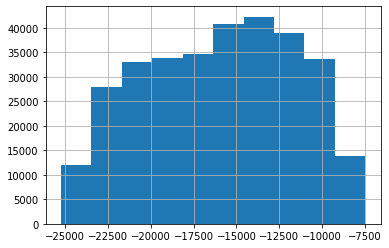

In [25]:
data.DAYS_BIRTH.hist()

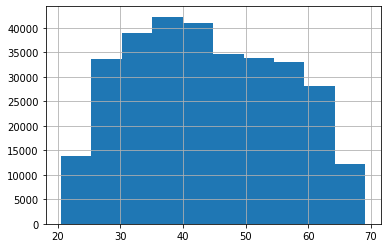

In [26]:
#create column for age to make it easier to visualise
data["AGE"] = abs(data["DAYS_BIRTH"]/365)

data.AGE.hist()

CLEANING AND FORMATTING

convert dates to datetime

In [27]:
data.loc[:, data.columns.str.contains('DATE')] = \
              data.loc[:, data.columns.str.contains('DATE')].apply(pd.to_datetime)
data.APPLICATION_DATE.head()

0   2019-05-31
1   2019-05-31
2   2019-05-31
3   2019-05-31
4   2019-05-31
Name: APPLICATION_DATE, dtype: datetime64[ns]

In [28]:
#examine the dates to determine duration and spread of values.
print('min-max for application date:',(min(data['APPLICATION_DATE']),max(data['APPLICATION_DATE'])))
print('min-max for default date known:',(min(data['DATE_DEFAULT_KNOWN']),max(data['DATE_DEFAULT_KNOWN'])))


min-max for application date: (Timestamp('2017-01-31 00:00:00'), Timestamp('2019-12-31 00:00:00'))
min-max for default date known: (Timestamp('2017-02-28 00:00:00'), Timestamp('2020-12-31 00:00:00'))


In [29]:
# are any defaults missing their default date?

#calculate duration of credit before default, where date is known.

In [30]:
#examine categorical and numerical columns

#categorical

print(data.select_dtypes(include=['object']).columns.tolist())

['CODE_GENDER', 'DEFAULT', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'HOUSETYPE_MODE', 'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'WEEKDAY_APPR_PROCESS_START']


In [31]:
#numeric 
print(data.select_dtypes(exclude=['object']).columns.tolist())

['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'APPLICATION_DATE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'DATE_DEFAULT_KNOWN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EDUCATION_CLASS', 'ETHNICITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_EMAIL', 'FLAG_EMP_PHONE', 

Remove missing APPLICATION_DATE rows

In [32]:
mod_data = data.dropna( how='all',
                    subset=['APPLICATION_DATE'])
mod_data['APPLICATION_DATE'].isna().sum()

0

remove first instance of duplicate rows in 'SK_ID_CURR'

In [33]:
#Make SK_ID_CURR the index
mod_data.set_index('SK_ID_CURR', inplace=True)




In [34]:
mod_data.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,SRC_VAR_1,SRC_VAR_4,WEEKDAY_APPR_PROCESS_START,AGE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100672,26217.0,808650,675000.0,112500,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0.007,3,3,-1.512,0.219,SUNDAY,57.827397
100713,32126.0,755190,675000.0,180000,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0.025,2,2,-0.538,0.551,WEDNESDAY,35.323288
100816,4950.0,88884,67500.0,157500,1.0,0.0,0.0,4.0,0.0,5.0,...,0,0,0,0.023,2,2,-0.592,0.525,TUESDAY,61.813699
100839,29354.0,824823,688500.0,180000,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0.025,2,2,-1.819,0.161,SATURDAY,45.293151
101245,19215.0,314100,225000.0,112500,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0.006,3,3,-1.923,0.146,TUESDAY,23.019178


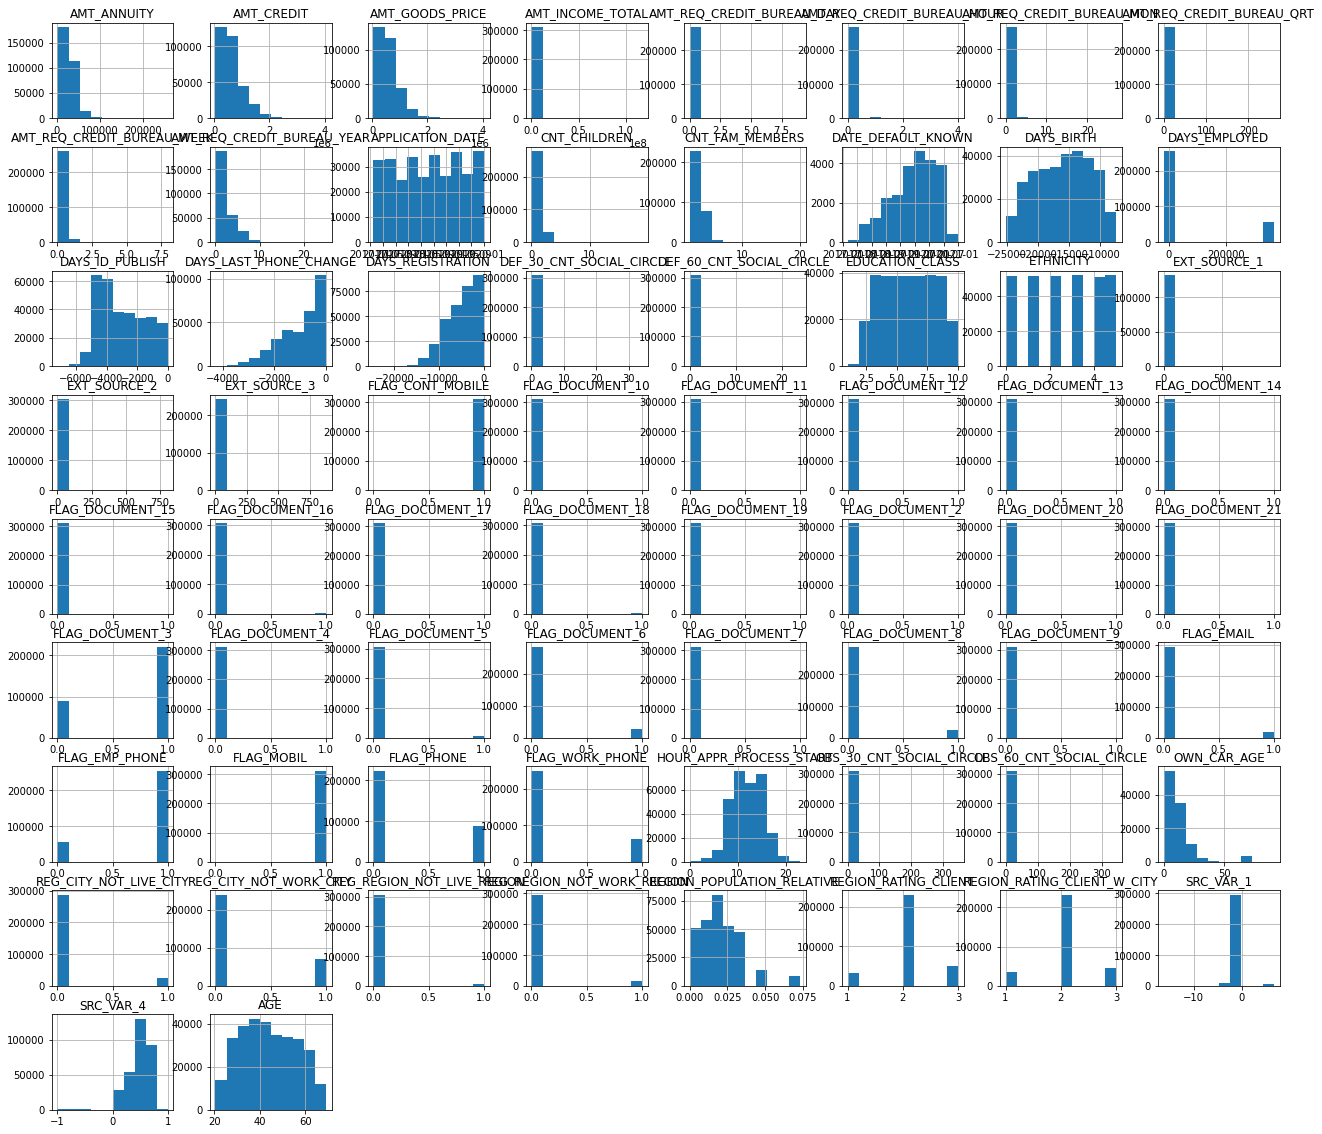

In [35]:
mod_data.hist( figsize = (22, 20) )
plt.show()

Deafults compared to Non-Defaults

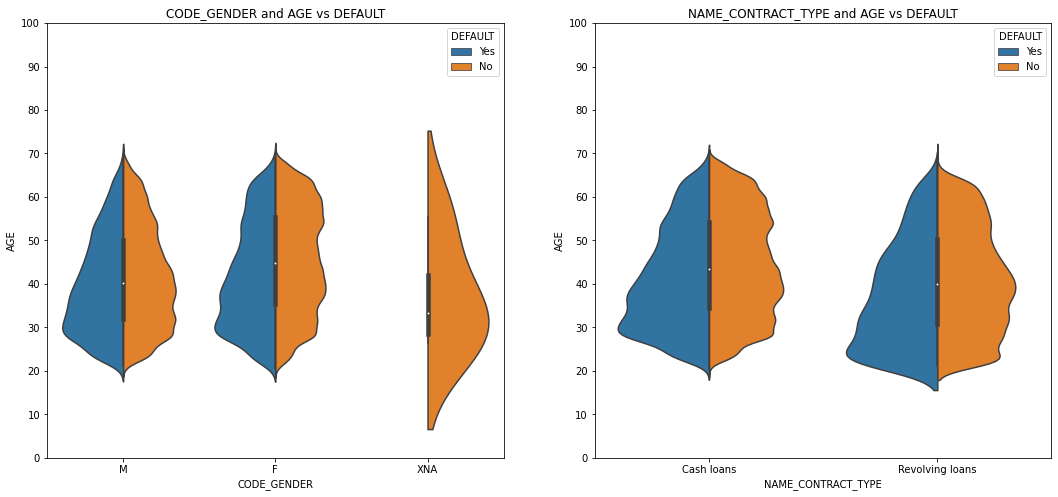

In [36]:
f,ax=plt.subplots(1,2,figsize = (18,8))
sns.violinplot("CODE_GENDER", "AGE", hue="DEFAULT", data=mod_data,split=True,ax=ax[0])
ax[0].set_title('CODE_GENDER and AGE vs DEFAULT')
ax[0].set_yticks(range(0,110,10))

sns.violinplot("NAME_CONTRACT_TYPE","AGE", hue="DEFAULT", data=mod_data,split=True,ax=ax[1])
ax[1].set_title('NAME_CONTRACT_TYPE and AGE vs DEFAULT')
ax[1].set_yticks(range(0,110,10))
plt.show()

Label Encoding

In [37]:
#examine number object categories again.
mod_data.select_dtypes('object').nunique().sort_values(axis=0, ascending=False)




OCCUPATION_TYPE               1017
ORGANIZATION_TYPE               58
NAME_INCOME_TYPE                 8
NAME_TYPE_SUITE                  7
WEEKDAY_APPR_PROCESS_START       7
NAME_FAMILY_STATUS               6
NAME_HOUSING_TYPE                6
NAME_EDUCATION_TYPE              5
CODE_GENDER                      3
HOUSETYPE_MODE                   3
DEFAULT                          2
FLAG_OWN_CAR                     2
FLAG_OWN_REALTY                  2
NAME_CONTRACT_TYPE               2
dtype: int64

In [38]:
mod_data.OCCUPATION_TYPE.value_counts()

Laborers       54537
Sales staff    31718
Core staff     27238
Managers       21156
Drivers        18388
               ...  
27.2               1
9.5                1
42.9               1
27.3               1
9.7                1
Name: OCCUPATION_TYPE, Length: 1017, dtype: int64

In [39]:
mod_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    68597
XNA                       55929
Self-employed             38752
Other                     16854
Medicine                  11307
Business Entity Type 2    10643
Government                10491
School                     8988
Trade: type 7              7895
Kindergarten               6946
Construction               6783
Business Entity Type 1     6036
Transport: type 4          5448
Trade: type 3              3518
Industry: type 9           3392
Industry: type 3           3301
Security                   3273
Housing                    2985
Industry: type 11          2730
Military                   2652
Bank                       2533
Agriculture                2476
Police                     2367
Transport: type 2          2230
Postal                     2174
Security Ministries        1994
Trade: type 2              1917
Restaurant                 1829
Services                   1589
University                 1337
Industry: type 7           1317
Transpor

In [40]:
mod_data.NAME_INCOME_TYPE.value_counts()

Working                 160169
Commercial associate     72288
Pensioner                55916
State servant            21909
Unemployed                  23
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [41]:
mod_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      250847
Family              40495
Spouse, partner     11478
Children             3290
Other_B              1784
Other_A               872
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [42]:
list(set(list(mod_data['ORGANIZATION_TYPE'])))

['Legal Services',
 'Mobile',
 'Kindergarten',
 'Postal',
 'Trade: type 5',
 'Industry: type 5',
 'Industry: type 4',
 'Industry: type 8',
 'Emergency',
 'Business Entity Type 1',
 'Industry: type 9',
 'Trade: type 6',
 'Transport: type 1',
 'Industry: type 10',
 'Other',
 'Agriculture',
 'Insurance',
 'School',
 'Telecom',
 'Industry: type 1',
 'Self-employed',
 'XNA',
 'University',
 'Trade: type 1',
 'Industry: type 2',
 'Industry: type 3',
 'Industry: type 7',
 'Restaurant',
 'Business Entity Type 3',
 'Trade: type 4',
 'Religion',
 'Housing',
 'Industry: type 12',
 'Hotel',
 'Culture',
 'Military',
 'Medicine',
 'Advertising',
 'Trade: type 7',
 'Electricity',
 'Cleaning',
 'Services',
 'Government',
 'Security Ministries',
 'Security',
 'Business Entity Type 2',
 'Trade: type 3',
 'Industry: type 11',
 'Police',
 'Transport: type 4',
 'Industry: type 6',
 'Realtor',
 'Trade: type 2',
 'Transport: type 3',
 'Industry: type 13',
 'Bank',
 'Construction',
 'Transport: type 2']

In [43]:
#Label Encode Objects with <= 2 categories
# from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

for col in mod_data:
    if mod_data[col].dtype=='object':
        
        if len(list(mod_data[col].unique())) <=2:
                      
            le.fit(mod_data[col])
            
            # Transform
            mod_data[col]=le.transform(mod_data[col])
            
            # Label Encoding
            le_count+=1
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [44]:
#one hot encode the remaining categorical ojects

mod_data = pd.get_dummies(mod_data)


print('Mod Data Features shape: ', mod_data.shape)

Mod Data Features shape:  (310338, 1191)


In [45]:
mod_data.describe()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
count,310325.000000,3.103380e+05,3.100550e+05,3.103380e+05,268431.000000,268431.000000,268431.000000,268431.000000,268431.000000,268431.000000,...,310338.000000,310338.000000,310338.000000,310338.000000,310338.000000,310338.000000,310338.000000,310338.000000,310338.000000,310338.000000
mean,27111.357593,5.990989e+05,5.384778e+05,1.687791e+05,0.007015,0.006408,0.267406,0.265409,0.034400,1.899572,...,0.017555,0.004308,0.180220,0.163647,0.165039,0.110206,0.052604,0.164527,0.175232,0.168745
std,14494.176224,4.025639e+05,3.695076e+05,2.362051e+05,0.111008,0.083888,0.916353,0.792585,0.204923,1.869051,...,0.131328,0.065495,0.384371,0.369956,0.371217,0.313146,0.223242,0.370754,0.380166,0.374527
min,1616.000000,4.500000e+04,4.050000e+04,2.565000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16524.000000,2.700000e+05,2.385000e+05,1.125000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24903.000000,5.135310e+05,4.500000e+05,1.476000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,34596.000000,8.086500e+05,6.795000e+05,2.025000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,258026.000000,4.050000e+06,4.050000e+06,1.170000e+08,9.000000,4.000000,27.000000,261.000000,8.000000,25.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
